In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import pickle


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from src.models import gan#, aae  # , vae
 
from src.common.helperfunctions import *
from src.common.accuracy_XGboost import *


import xgboost as xgb
import time
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'data/raw/creditcard.csv'
df = pd.read_csv(file_name)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
label_col = []
feature_cols = []
label_col = [i for i in df.columns if 'Class' in i]
feature_cols = [i for i in df.columns if i not in label_col]

In [4]:
X = df.loc[:,feature_cols]
y = df.loc[:,label_col]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
train = pd.concat([train_X, train_y], axis=1)

In [7]:
train_Class = train[train.Class == 1]

In [8]:
sc = StandardScaler()
train.loc[:,'Amount'] = sc.fit_transform(train.Amount.values.reshape(-1, 1))
test_X.loc[:,'Amount'] = sc.transform(test_X.Amount.values.reshape(-1, 1))
train.drop('Time',axis=1, inplace=True)
test_X.drop('Time', axis=1, inplace=True)

C:\Users\chinne\Anaconda3\envs\DGM\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\chinne\Anaconda3\envs\DGM\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
label_col = []
feature_cols = []
label_col = [i for i in train.columns if 'Class' in i]
feature_cols = [i for i in train.columns if i not in label_col]

# Train GAN

In [10]:
train_Class.drop('Class', axis = 1,inplace=True)
train_Class.drop('Time', axis = 1,inplace=True)

In [11]:
train_Class.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [12]:
df = prepareDataset(train_Class, batch_size = 64, device = 'cpu', label = 'no')

In [13]:
df.dataset.features.size(1)

29

In [14]:
xgblosses, G_losses, D_losses = gan.train(df, randomNoise_dim = 29, hidden_dim = 64, realData_dim =df.dataset.features.size(1), lr = 0.002, num_epochs=1500, device='cpu')

Starting Training Loop...
epoch: 0, Accuracy: 0.8756345177664975
[0/1501][6/7]	Loss_D: 0.8984	Loss_G: 0.6933	
epoch: 10, Accuracy: 0.6370558375634517
[10/1501][6/7]	Loss_D: 0.1611	Loss_G: 4.1653	
epoch: 20, Accuracy: 0.7842639593908629
[20/1501][6/7]	Loss_D: 0.6372	Loss_G: 2.5601	
epoch: 30, Accuracy: 0.868020304568528
[30/1501][6/7]	Loss_D: 0.5418	Loss_G: 2.4956	
epoch: 40, Accuracy: 0.9873096446700508
[40/1501][6/7]	Loss_D: 0.9112	Loss_G: 1.4611	
epoch: 50, Accuracy: 0.949238578680203
[50/1501][6/7]	Loss_D: 0.8619	Loss_G: 1.7165	
epoch: 60, Accuracy: 0.9771573604060914
[60/1501][6/7]	Loss_D: 0.7240	Loss_G: 1.3171	
epoch: 70, Accuracy: 0.934010152284264
[70/1501][6/7]	Loss_D: 1.6737	Loss_G: 1.0795	
epoch: 80, Accuracy: 0.9111675126903553
[80/1501][6/7]	Loss_D: 1.0689	Loss_G: 1.0758	
epoch: 90, Accuracy: 0.9263959390862944
[90/1501][6/7]	Loss_D: 0.9612	Loss_G: 1.1131	
epoch: 100, Accuracy: 0.9238578680203046
[100/1501][6/7]	Loss_D: 0.9870	Loss_G: 1.3411	
epoch: 110, Accuracy: 0.9340101

In [21]:
xgblosses

array([0.87563452, 0.63705584, 0.78426396, 0.8680203 , 0.98730964,
       0.94923858, 0.97715736, 0.93401015, 0.91116751, 0.92639594,
       0.92385787, 0.93401015, 0.92893401, 0.92385787, 0.92385787,
       0.83502538, 0.92385787, 0.95431472, 0.89340102, 0.95431472,
       0.94923858, 0.92893401, 0.87055838, 0.93908629, 0.82994924,
       0.91624365, 0.84771574, 0.82233503, 0.87055838, 0.6751269 ,
       0.91624365, 0.84010152, 0.91878173, 0.75888325, 0.84517766,
       0.95177665, 0.92893401, 0.93147208, 0.89593909, 0.89086294,
       0.9213198 , 0.78680203, 0.93654822, 0.93654822, 0.83502538,
       0.90101523, 0.87309645, 0.87563452, 0.84771574, 0.85786802,
       0.87055838, 0.85025381, 0.65989848, 0.74365482, 0.81725888,
       0.82233503, 0.91370558, 0.90101523, 0.7715736 , 0.88071066,
       0.8680203 , 0.81472081, 0.85025381, 0.88324873, 0.86294416,
       0.87055838, 0.86548223, 0.85532995, 0.8680203 , 0.77664975,
       0.88832487, 0.80203046, 0.83248731, 0.65736041, 0.75380

In [24]:
number = 0.65736041

In [25]:
for i in range(xgblosses.size):
    if np.round(xgblosses[i],8) == number:
        print(i*10)

730


0.6370558375634517


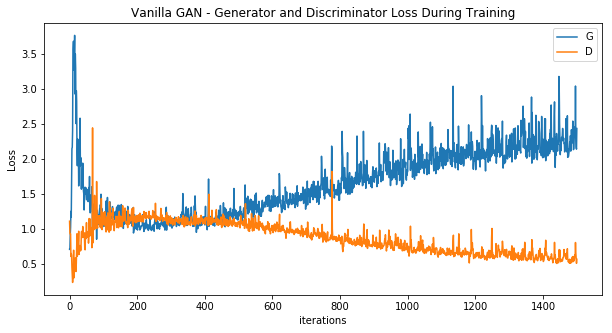

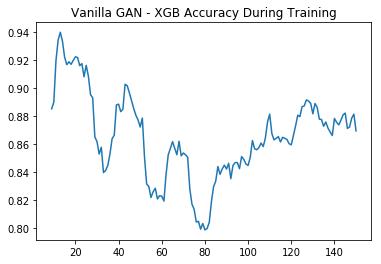

In [20]:
print(min(xgblosses))
plt.figure(figsize=(10,5))
plt.title(f"Vanilla GAN - Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f'reports/figures/gan/GAN.png')
plt.show()

w = 10
a = pd.DataFrame(xgblosses[:]).rolling(w).mean()
plt.title(f"Vanilla GAN - XGB Accuracy During Training")
plt.plot(a)
plt.savefig(f'reports/figures/gan/xgblosses_GAN.png')
plt.show()

In [26]:
amount=train_X.shape[0]
device='cpu'

In [27]:
randomNoise_dim = 29; hidden_dim = 64; realData_dim =df.dataset.features.size(1)

In [28]:
more_data = gan.generate_data(730, randomNoise_dim, hidden_dim, realData_dim, amount, 'cpu')

In [29]:
more_data = more_data.detach().numpy()

In [30]:
b = np.ones((more_data.shape[0],more_data.shape[1]+1))
b[:,:-1] = more_data

In [ ]:
b

In [31]:
df_generatedData = pd.DataFrame(b, columns = feature_cols + label_col)
df_generatedData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-4.638715,3.572055,-3.823397,5.949512,-3.788929,-1.274548,-6.655632,2.715931,-4.824942,-6.610353,...,1.373171,0.312899,-0.299525,0.132043,-0.038041,0.309064,1.545302,0.381994,26.798315,1.0
1,-1.427995,1.403289,-3.212017,2.850598,-0.771291,-1.728487,0.051661,0.835409,-1.809643,-2.911268,...,-0.483126,0.557008,0.657995,0.348007,-1.816196,-0.189136,1.191800,-0.401033,449.359650,1.0
2,-0.534427,1.189443,-1.984684,3.133942,-0.562374,-1.143634,-2.564760,0.649878,-1.426495,-1.856180,...,0.502996,0.492509,-0.397957,-0.554950,-0.381981,-0.240591,0.348471,0.223105,4.787001,1.0
3,-0.776861,5.106525,-8.084860,8.509481,-2.943954,-3.212027,-7.968040,1.090400,-5.329693,-11.460943,...,1.972168,-0.320492,-0.340189,-0.685340,1.125186,1.198872,2.305622,0.843566,4.836034,1.0
4,-22.715382,12.053975,-22.450132,10.975190,-15.655964,0.821218,-30.593565,-10.997276,-10.167298,-22.158409,...,-6.110253,2.362034,0.913824,-0.182742,-0.158333,-2.423579,-1.179222,-1.312947,-0.974570,1.0


In [32]:
train.shape

(227845, 30)

In [33]:
train = train.append(df_generatedData)

In [34]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [35]:
train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [36]:
train_y = train.Class

In [37]:
train_y.isnull().sum()

0

In [38]:
train_X = train.drop('Class', axis=1, inplace=True)

# XGBoost

In [39]:
dtest.feature_names

NameError: name 'dtest' is not defined

In [40]:
start_time = time.time()
dtrain = xgb.DMatrix(train_X, train_y, feature_names=feature_cols)
dtest = xgb.DMatrix(test_X, test_y, feature_names=feature_cols)

results_dict = {}

param = {
        'max_depth':5, 
        'eta':0.3, 
        'verbosity': 1, 
        'objective':'binary:logistic', 
        'eval_metric': 'auc', 
        'seed': 42
        }

model = xgb.train(param, dtrain, num_boost_round=20)
# make prediction
preds = model.predict(dtest)
elapsed_time = time.time() - start_time
print('Time elapsed to train: ', elapsed_time)

OSError: exception: access violation reading 0x0000000000000008

In [ ]:
preds = preds.round()

In [ ]:
print('---' * 45)
print('XGBoost ROC/AUC: {:.6f}'.format(roc_auc_score(test_y, preds)))
print('Recall Score: {:.6f}'.format(recall_score(test_y, preds)))
print('Precision Score: {:.6f}'.format(precision_score(test_y, preds)))
print('F1 Score: {:.6f}'.format(f1_score(test_y, preds)))
print('Accuracy Score: {:.6f}'.format(accuracy_score(test_y, preds)))
print('---' * 45)